# Adult Income Census- Project

## Background 

## Part 1: Data and Libraries Setup 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"Downloads/train.csv")
print("train data read successfully")

train data read successfully


In [3]:
df.head()

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,0,60,Self-emp-not-inc,235535,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,1,28,Self-emp-not-inc,123983,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,2,71,Self-emp-not-inc,130436,1st-4th,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,3,75,NaN,35724,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,4,50,Private,128143,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K


In [4]:
df.tail()

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
32719,32719,56,Private,285730,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
32720,32720,36,Private,135289,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,<=50K
32721,32721,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<=50K
32722,32722,55,Private,145214,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,4650,0,20,United-States,<=50K
32723,32723,46,Private,172581,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,50,United-States,>50K


In [5]:
df.shape

(32724, 16)

In [6]:
df.dtypes

ID                 int64
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
net-income        object
dtype: object

In [7]:
df.describe()

,ID,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32724.000000,32724.000000,3.272400e+04,32724.000000,32724.000000,32724.000000,32724.000000
mean,16361.500000,38.574257,1.894990e+05,10.079941,1078.228792,87.700403,40.406216
std,9446.749441,13.712166,1.053437e+05,2.568684,7480.459910,401.872849,12.454379
min,0.000000,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,8180.750000,28.000000,1.175280e+05,9.000000,0.000000,0.000000,40.000000
50%,16361.500000,37.000000,1.779005e+05,10.000000,0.000000,0.000000,40.000000
75%,24542.250000,48.000000,2.370062e+05,12.000000,0.000000,0.000000,45.000000
max,32723.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Part 2: Treating Missing Values

In [8]:
df.isna().sum().sort_values(ascending=False)

occupation        1901
workclass         1895
native-country     568
net-income           0
hours-per-week       0
capital-loss         0
capital-gain         0
gender               0
race                 0
relationship         0
marital-status       0
education-num        0
education            0
fnlwgt               0
age                  0
ID                   0
dtype: int64

In [9]:
df['occupation'].unique()

array(['Exec-managerial', 'Sales', 'Craft-repair', nan,
       'Transport-moving', 'Machine-op-inspct', 'Tech-support',
       'Handlers-cleaners', 'Adm-clerical', 'Prof-specialty',
       'Other-service', 'Priv-house-serv', 'Protective-serv',
       'Farming-fishing', 'Armed-Forces'], dtype=object)

In [10]:
df['workclass'].unique()

array(['Self-emp-not-inc', nan, 'Private', 'State-gov', 'Local-gov',
       'Federal-gov', 'Self-emp-inc', 'Never-worked', 'Without-pay'],
      dtype=object)

In [11]:
df['native-country'].unique()

array(['United-States', 'South', 'India', 'Mexico', 'Iran', 'Cuba', nan,
       'Vietnam', 'England', 'Philippines', 'Laos', 'Canada', 'China',
       'Poland', 'El-Salvador', 'Dominican-Republic', 'Jamaica',
       'Guatemala', 'Japan', 'Hong', 'Haiti', 'Germany', 'France',
       'Puerto-Rico', 'Trinadad&Tobago', 'Portugal',
       'Outlying-US(Guam-USVI-etc)', 'Ireland', 'Columbia', 'Ecuador',
       'Nicaragua', 'Taiwan', 'Hungary', 'Italy', 'Scotland', 'Thailand',
       'Honduras', 'Cambodia', 'Greece', 'Yugoslavia', 'Peru',
       'Holand-Netherlands'], dtype=object)

In [12]:
null_columns =['workclass','occupation','native-country']
for i in null_columns:
    df.fillna(df[i].mode()[0], inplace=True)

In [13]:
df.isna().sum().sort_values(ascending=False)

net-income        0
native-country    0
hours-per-week    0
capital-loss      0
capital-gain      0
gender            0
race              0
relationship      0
occupation        0
marital-status    0
education-num     0
education         0
fnlwgt            0
workclass         0
age               0
ID                0
dtype: int64

## Part 3: Exploratory Data Analysis 

### Find the relationship between all numerical variables 

In [14]:
corr=df.corr()

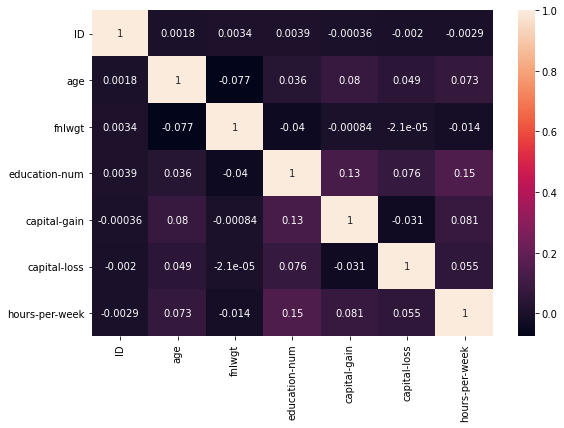

In [15]:
plt.figure(figsize=(9,6))
sns.heatmap(corr,annot=True);

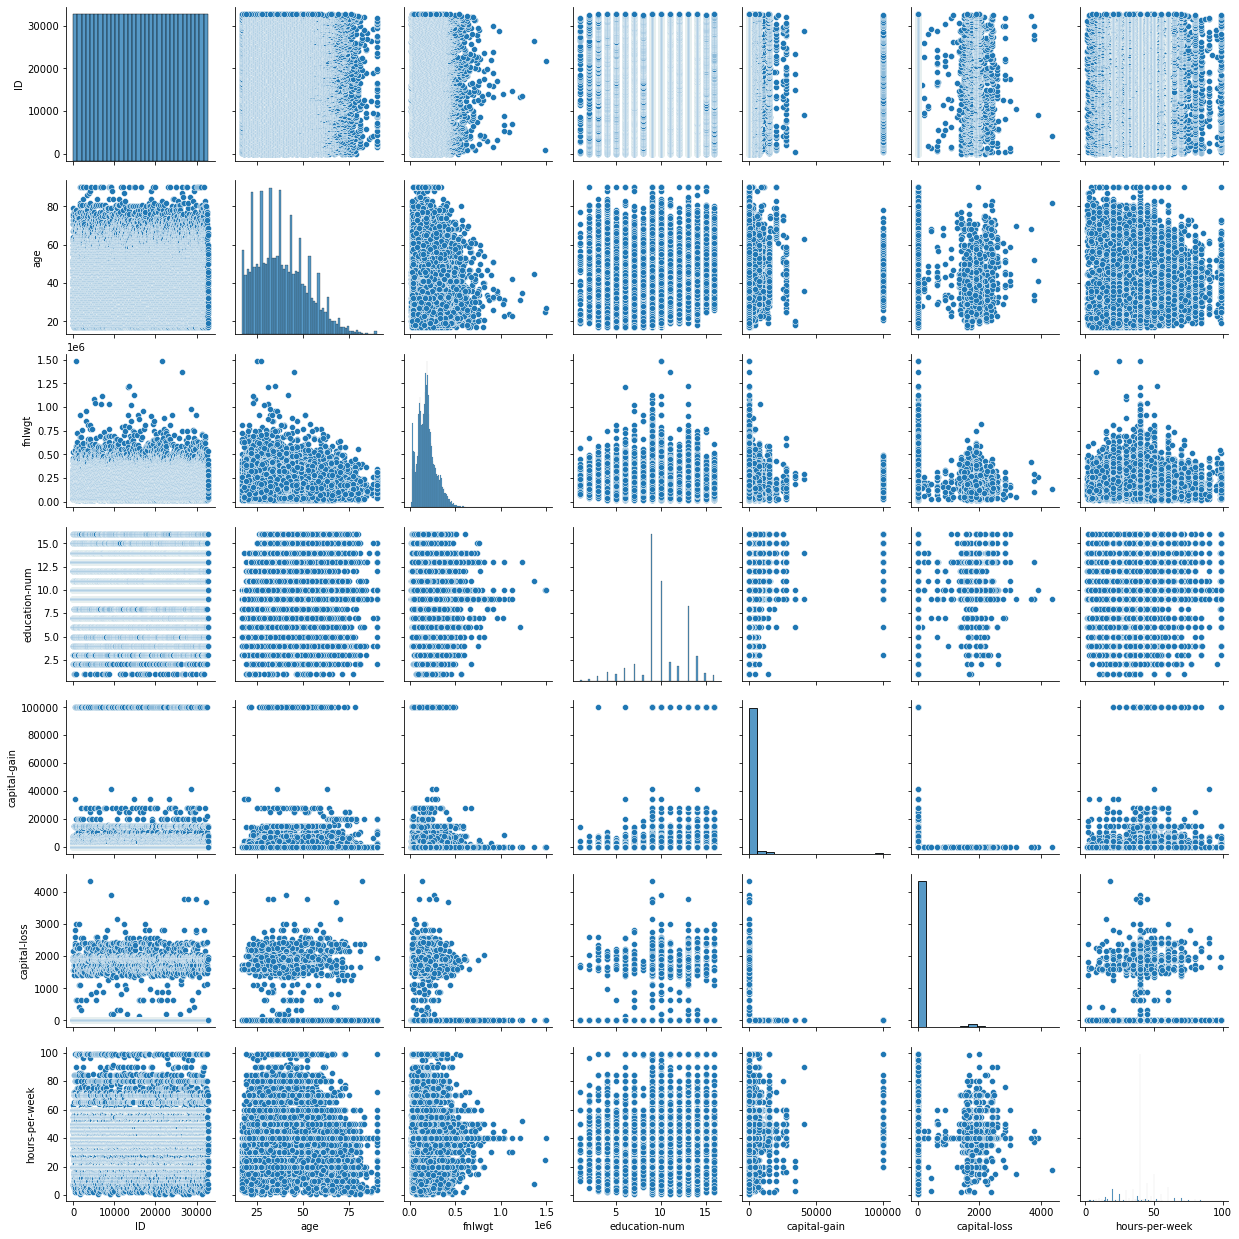

In [16]:
sns.pairplot(df);

### Distribute the population based on their income 

In [17]:
df['net-income'].value_counts()

<=50K    24928
>50K      7796
Name: net-income, dtype: int64

In [18]:
df['net-income'].value_counts(normalize=True)

<=50K    0.761765
>50K     0.238235
Name: net-income, dtype: float64

### 1. Find out maximum number of people belong to which age group based on their income 

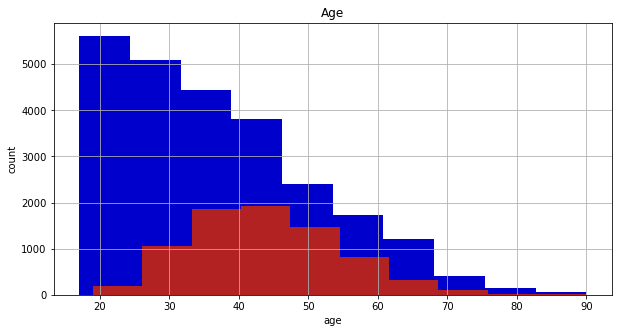

In [19]:
plt.figure(figsize=(10,5))
df[df['net-income']=='<=50K']['age'].hist(color='mediumblue')
df[df['net-income']=='>50K']['age'].hist(color='firebrick')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age')
plt.show()

### 2. Which workclass has the maximum population with salary less than 50K 

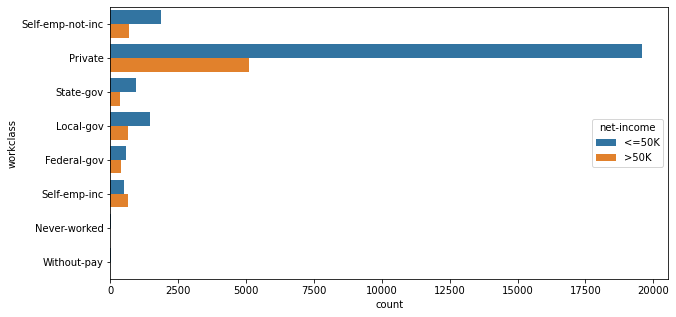

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['workclass'], hue=df['net-income'])
plt.show()

### 3. Plot the counts of gender and race columns based on income

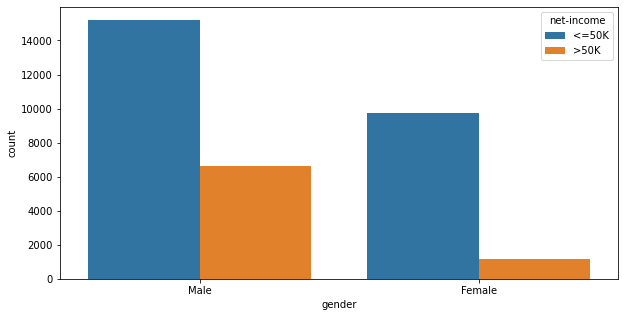

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(df['gender'], hue=df['net-income'])
plt.show()

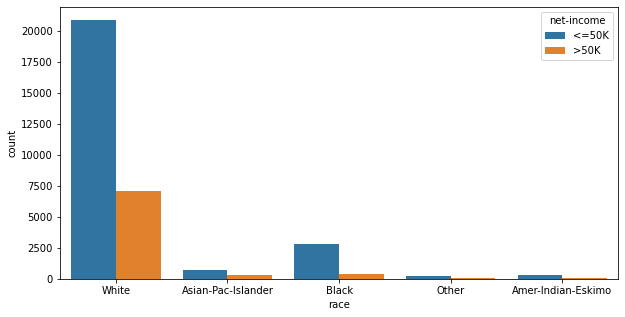

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['race'], hue=df['net-income'])
plt.show()

### 4. Plot the education based on gender and name the top three education qualification with large population 

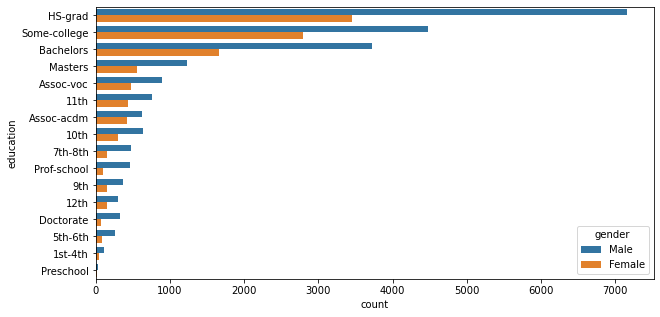

In [23]:
fig = plt.figure(figsize=(10,5))
sns.countplot(y=df['education'], hue=df['gender'], order = df['education'].value_counts().index)
plt.show()

### 5. What should be the highest education qualification to earn  more than 50K

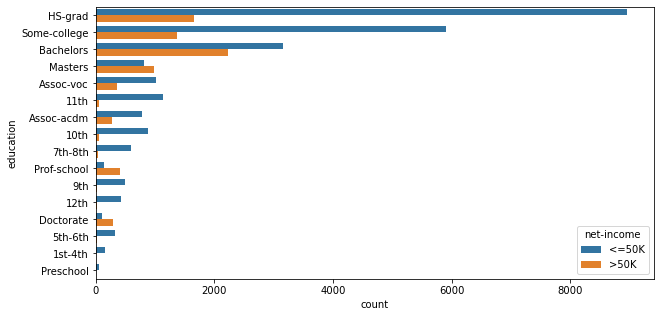

In [24]:
fig = plt.figure(figsize=(10,5))
sns.countplot(y=df['education'], hue=df['net-income'], order = df['education'].value_counts().index)
plt.show()

### 6. Which relationship has the maximum population with salary greater than 50K and less than 50K 

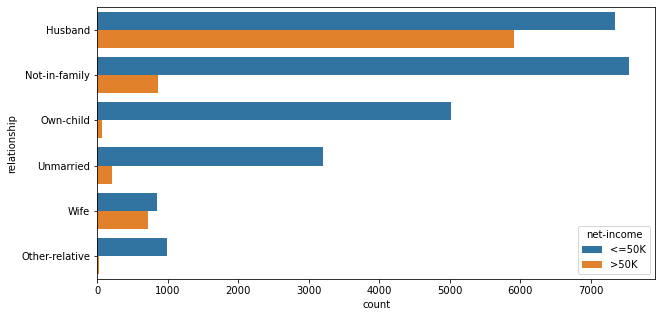

In [25]:
fig = plt.figure(figsize=(10,5))
sns.countplot(y=df['relationship'], hue=df['net-income'], order = df['relationship'].value_counts().index)
plt.show()

### 7. According to hours per week, show the group within which maximum population works based on their income 

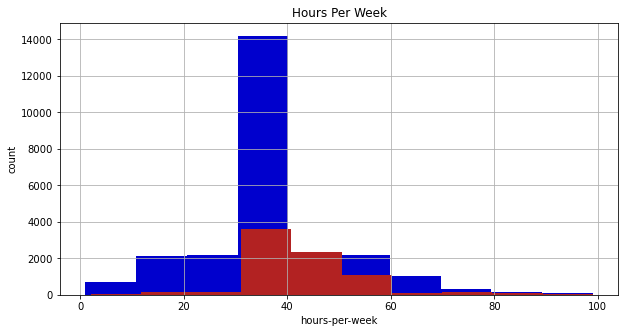

In [26]:
plt.figure(figsize=(10,5))
df[df['net-income']=='<=50K']['hours-per-week'].hist(color='mediumblue')
df[df['net-income']=='>50K']['hours-per-week'].hist(color='firebrick')
plt.xlabel('hours-per-week')
plt.ylabel('count')
plt.title('Hours Per Week')
plt.show()

### 8. Plot occupation based on income, and mention top three occupation with income greater than 50K 

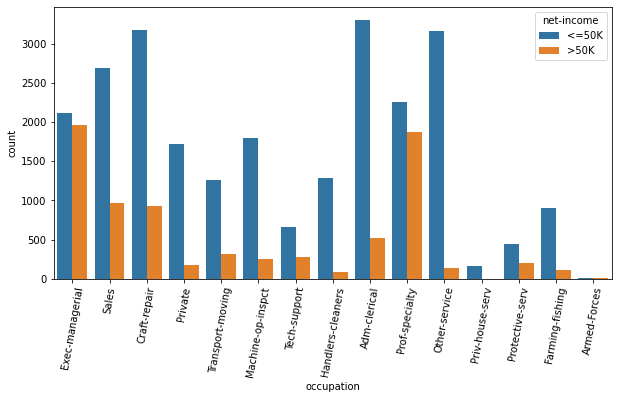

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['occupation'], hue=df['net-income'])
plt.xticks(rotation=80);

## Conclusion from the Analysis 